<a href="https://colab.research.google.com/github/biswa2005/ML-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [3]:
df = pd.DataFrame(X, columns=['feat_1', 'feat_2'])

In [4]:
df.head()

,feat_1,feat_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)



###K_Means Clustering

In [6]:
inertia = []
k_range = range(1, 11)

In [7]:
for k in k_range :
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [9]:
inertia

[999.9999999999994,
 528.8064432605643,
 294.4377068678185,
 250.4552469653445,
 216.88110656982604,
 185.27440675195913,
 156.70879996290438,
 135.62603453115264,
 129.1039634823981,
 119.94101297104991]

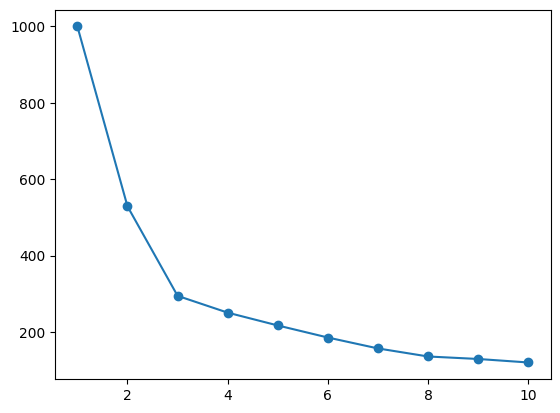

In [10]:
plt.plot(k_range, inertia, marker='o')

In [21]:
kmeans_final = KMeans(n_clusters=3, random_state=42)


In [22]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [23]:
df['cluster'] = cluster_labels


<Axes: xlabel='feat_1', ylabel='feat_2'>

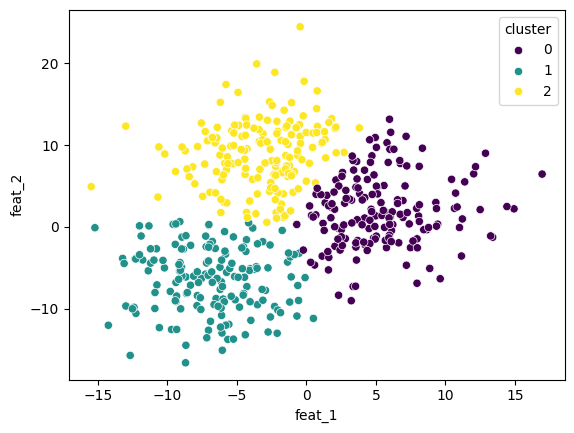

In [24]:
sns.scatterplot(x=df['feat_1'],
                y=df['feat_2'],
                hue=df['cluster'],
                palette='viridis')

###DBScan Algorithm

In [30]:
from sklearn.cluster import DBSCAN

In [25]:
from sklearn.datasets import make_moons

In [26]:
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

In [27]:
df = pd.DataFrame(X, columns=['feat_1', 'feat_2'])

In [28]:
df.head()

,feat_1,feat_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [31]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [32]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='feat_1', ylabel='feat_2'>

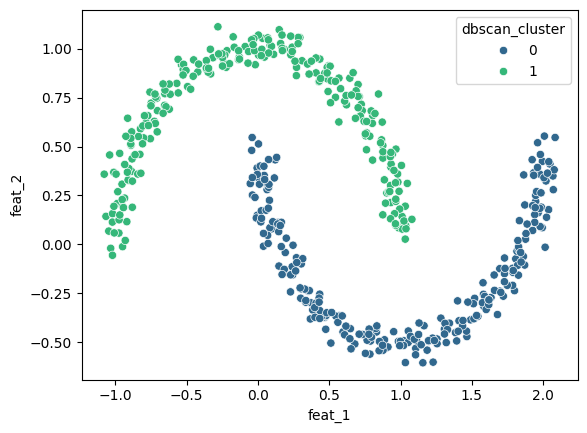

In [34]:
sns.scatterplot(data=df, x=df['feat_1'], y=df['feat_2'], hue=df['dbscan_cluster'], palette='viridis')